### Importando as bibliotecas:

In [183]:
# Importando as bibliotecas necessárias:
from sympy import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Importando as bibliotecas do scikit learn:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [184]:
# Defindo a semente (Gerar números PSEUDO-aleatórios)
semente = 42

# Definindo o número de exemplos:
N = 100

### Definindo o dataset:

In [185]:
# DECLARA OS VALORES DE TREINAMENTO:

# Features:
x1_t = [4, 5, 3, 6, 6, 7, 8, 10, 12]
x2_t = [7, 6, 4, 9, 4, 6, 0, 10, 3]

# Targets:
y  = [0, 0, 0, 0, 1, 1, 1, 1, 1]

# Faz a concatenação das features:
x = np.c_[x1, x2]

In [186]:
# DECLARA OS VALORES DE VALIDAÇÃO:

# Features:
x_v = [[6, 5]]

### Criando o algorítmo:

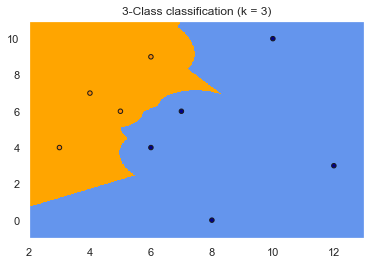

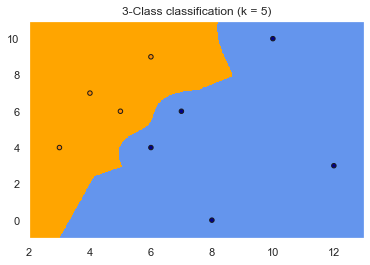

In [187]:
# Tamanho do passo de aprendizado
h = .02 

# Cria os mapas de cores
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for k in [3, 5]:
    # Cria uma instância para o classificador k-NN.
    clf = KNeighborsClassifier(k, weights='distance')
    
    # Faz o treinamento do classificador
    clf.fit(x, y)

    # Faz a plotagem da decisão
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Coloca o resultado em uma figura colorida
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plotagem dos pontos de treinamento
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))

plt.show()

In [188]:
# Faz a segregação dos dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=semente)

acc_train = []
acc_test = []
score_max = 0
k_max = 0
for k in range(1,5):
    # Create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k, weights='distance')
    # Faz o treinamento do classificador
    clf.fit(x_train, y_train)
    # Faz a predição do modelo.
    y_pred = clf.predict(x_test)
    # Calcula as métricas de desempenho.
    score_test = clf.score(x_test, y_test)
    acc_test.append(score_test)
    score_train = clf.score(x_train, y_train)
    acc_train.append(score_train)    
    if(score_test > score_max):
        score_max = score_test
        k_max = k

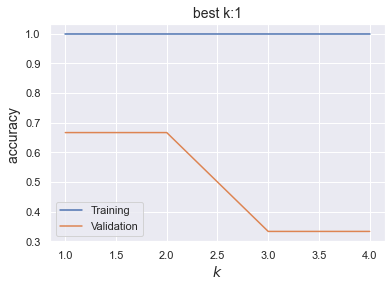

In [189]:
plt.plot(range(1,5), acc_train, label='Training')
plt.plot(range(1,5), acc_test, label='Validation')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('accuracy ', fontsize=14)
plt.title('best k:'+str(k_max), fontsize=14)
plt.legend()
plt.show()

### Predição dos valores de validação (K = 3):

In [190]:
# Instanciação:
clf = clf = KNeighborsClassifier(3)

# Treinamento:
clf.fit(x, y)

# Predição para os valores de validação:
y_pred = clf.predict(x_v)

# Calculo da probabilidade:
y_prob = clf.predict_proba(x_v)

##### Saída:

In [191]:
print('Para K = 3 temos que a validação de {} sendo calsse {} e com probabilidade de {:.2f}% e {:.2f}%'.format(x_v, y_pred, y_prob[0, 0] * 100, y_prob[0, 1] * 100))

Para K = 3 temos que a validação de [[6, 5]] sendo calsse [1] e com probabilidade de 33.33% e 66.67%


### Predição dos valores de validação (K = 5):

In [193]:
# Instanciação:
clf = clf = KNeighborsClassifier(5)

# Treinamento:
clf.fit(x, y)

# Predição para os valores de validação:
y_pred = clf.predict(x_v)

# Calculo da probabilidade:
y_prob = clf.predict_proba(x_v)

##### Saída:

In [194]:
print('Para K = 3 temos que a validação de {} sendo calsse {} e com probabilidade de {:.2f}% e {:.2f}%'.format(x_v, y_pred, y_prob[0, 0] * 100, y_prob[0, 1] * 100))

Para K = 3 temos que a validação de [[6, 5]] sendo calsse [0] e com probabilidade de 60.00% e 40.00%


## K = 1, 2

# ...

## APENAS PARA CURIOSIDADE

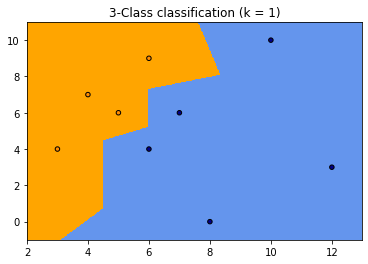

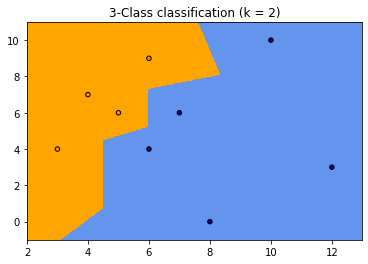

In [171]:
for k in [1, 2]:
    # Cria uma instância para o classificador k-NN.
    clf = KNeighborsClassifier(k, weights='distance')
    
    # Faz o treinamento do classificador
    clf.fit(x, y)

    # Faz a plotagem da decisão
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Coloca o resultado em uma figura colorida
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plotagem dos pontos de treinamento
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))

plt.show()

### Predição dos valores de validação (K = 1):

In [177]:
# Instanciação:
clf = clf = KNeighborsClassifier(1)

# Treinamento:
clf.fit(x, y)

# Predição para os valores de validação:
y_pred = clf.predict(x_v)

# Calculo da probabilidade:
y_prob = clf.predict_proba(x_v)

##### Saída:

In [178]:
print('Para K = 3 temos que a validação de {} sendo calsse {} e com probabilidade de {:.2f}% e {:.2f}%'.format(x_v, y_pred, y_prob[0, 0] * 100, y_prob[0, 1] * 100))

Para K = 3 temos que a validação de [[6, 5]] sendo calsse [1] e com probabilidade de 0.00% e 100.00%


### Predição dos valores de validação (K = 2):

In [179]:
# Instanciação:
clf = clf = KNeighborsClassifier(2)

# Treinamento:
clf.fit(x, y)

# Predição para os valores de validação:
y_pred = clf.predict(x_v)

# Calculo da probabilidade:
y_prob = clf.predict_proba(x_v)

##### Saída:

In [180]:
print('Para K = 3 temos que a validação de {} sendo calsse {} e com probabilidade de {:.2f}% e {:.2f}%'.format(x_v, y_pred, y_prob[0, 0] * 100, y_prob[0, 1] * 100))

Para K = 3 temos que a validação de [[6, 5]] sendo calsse [0] e com probabilidade de 50.00% e 50.00%


# Dúvidas:

Seria o K = 1 o hiperparâmetro perfeito para este dataset? 

Por que o gráfico e a probabilidade apresentaram resultados diferentes? 